# Dense Neural Network: Regression

In this example we will build a densely connected neural network or DNN. To do this, we will use the Keras library for Deep Learning.

We start by loading the libraries that we will use.

In [ ]:
# data analytics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keras (Tensorflow)
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# dataset of Sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

**1. Dataset Exploration**

We will consider an example of regression. For this we will consider the database of California houses, which is found in the Sklearn library.

In [ ]:
# load data
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# local loading
# df = pd.read_csv('housing.csv')
# df.columns = ['Longitude', 'Latitude', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedInc', 'MedHouseVal', 'OceanProximity']
# df = df.drop('OceanProximity', axis=1)

In [ ]:
# dataset information
print(california_housing.DESCR)

In [ ]:
# dataset exploration
df.head()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,MedHouseVal
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
# dataset size
df.shape

(20640, 9)

In [ ]:
# dataset statistics
df.describe()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


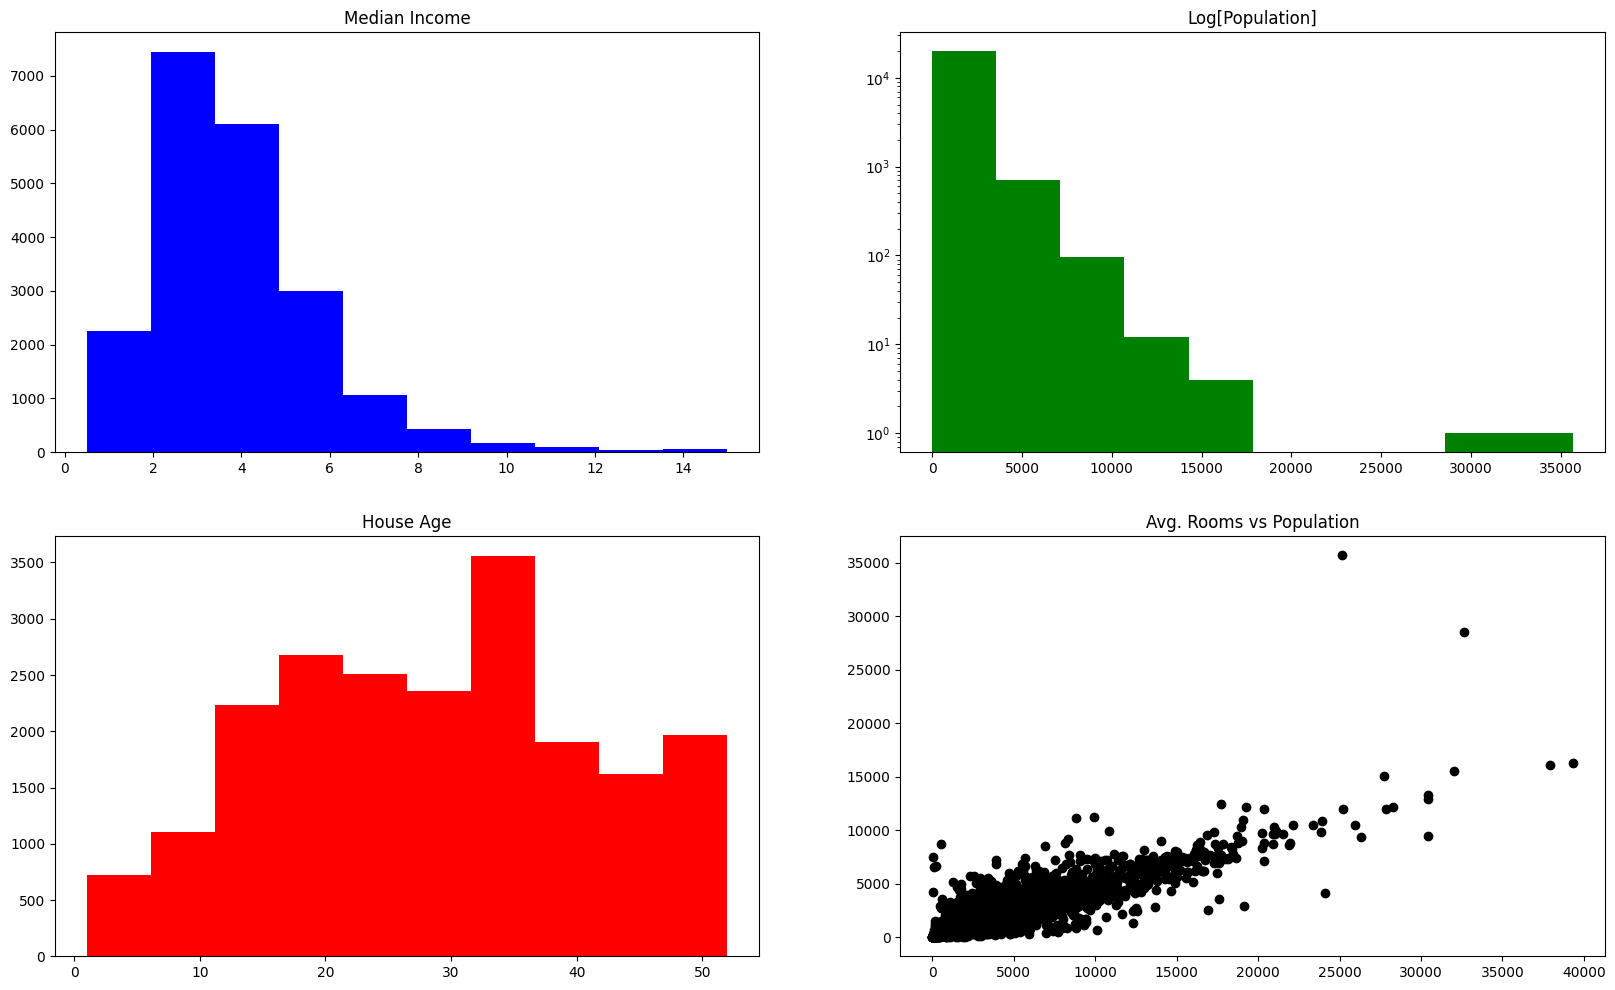

In [ ]:
# dataset visualization
fig, ax = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(12)

x = ax[0,0].hist(df['MedInc'], bins=10, color='blue')
ax[0,0].title.set_text('Median Income')

x = ax[1,0].hist(df['HouseAge'], bins=10, color='red')
ax[1,0].title.set_text('House Age')

x = ax[0,1].hist(df['Population'], log=True, color='green')
ax[0,1].title.set_text('Log[Population]')

x = ax[1,1].scatter(df['AveRooms'], df['Population'], color='black')
ax[1,1].title.set_text('Avg. Rooms vs Population')

<Axes: >

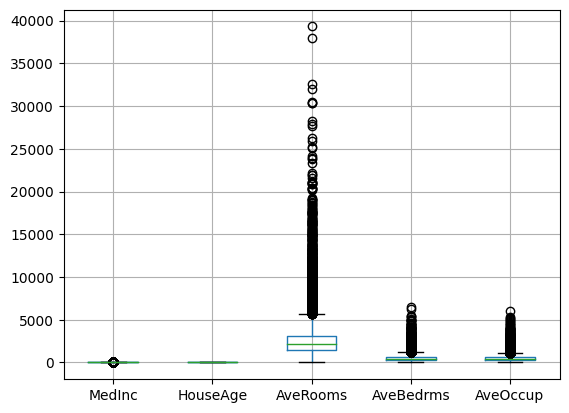

In [ ]:
# outliers
df.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'])

<Axes: >

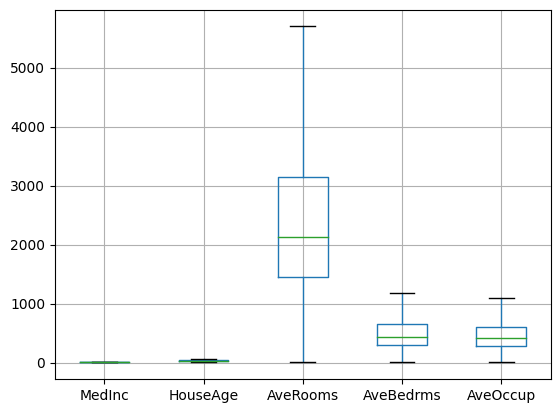

In [ ]:
# outlier removal
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
for col in cols:
  Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
  IQR = Q3 - Q1
  max = Q3 + 1.5*IQR
  df[col].iloc[df[df[col] > max].index] = max

df.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'])

**2. Model construction**

Having loaded and prepared the data, we will proceed to build a base model for the DNN neural network.

In [ ]:
# training features
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = df[['MedHouseVal']] # target

# separation of datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

To avoid saturation of the activation functions and speed up the learning of the neural network, we re-scale the input variables (and the outputs).

In [ ]:
# define scaler
scaler = StandardScaler()

# scale separately to avoid contamination of training and validation data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [ ]:
pd.DataFrame(data=X_train, columns=df.columns.drop('MedHouseVal'))

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc
0,-1.703610,-0.758685,-1.121642,-0.666115,-0.614962,-0.728876,-0.783153,0.650904
1,0.250937,0.352399,0.136199,-0.141761,-0.362823,-0.164713,0.847598,-1.319117
2,-0.155610,1.066667,-0.922245,-0.836269,-0.337522,-0.864275,-0.872188,0.660879
3,-1.302127,-0.361869,-0.616361,-0.398729,0.222592,-0.371573,0.102513,0.162139
4,0.110900,-1.155500,1.896462,2.322009,1.140412,2.338287,0.885086,-1.184457
...,...,...,...,...,...,...,...,...
13823,1.545086,0.511125,-0.802179,-1.055040,-0.674288,-0.954541,-0.876874,0.810501
13824,-0.456300,0.352399,0.451374,0.226329,0.281047,-0.081969,-0.764409,1.074833
13825,-0.525987,0.590488,-0.251159,0.222856,0.283664,0.211395,-0.759723,0.601030
13826,1.152766,-1.076137,0.802283,0.320087,0.301985,0.331750,0.903830,-1.184457


In [ ]:
print('MedHouseVal')
y_train

MedHouseVal


array([[-0.73904434],
       [ 1.36115317],
       [-0.0092192 ],
       ...,
       [ 0.13379879],
       [ 0.66599906],
       [ 1.02571098]])

In [ ]:
# baseline model
def baseline_model(X, n_hidden):

	# declare a sequential model (layered model)
	model = Sequential()

	# add the hidden layer (we must indicate the dimension of the input data)
	model.add(Dense(n_hidden, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))

	# add the output layer (a node since it is regression)
	model.add(Dense(1, kernel_initializer='normal'))

	# compile the model
	model.compile(loss='mse', metrics=['mae', 'mape'], optimizer='adam')

	return model

In [ ]:
# create an object for the model
model = baseline_model(X_train, 10) # 10 nodos en capa oculta

# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We have 8 inputs (plus the bias), that is, 9 nodes in the input layer. Since they connect with 10 hidden layer nodes, we have 90 weights. Then, we have 10 nodes (plus the bias), that is, 11 nodes in the hidden layer. Since they connect with 1 node in the output layer, we have 11 weights.

Therefore, in total we have 101 weights in this neural network.

In [ ]:
# we train the neural network
# epochs is the no. of iterations on the network
# batch size is how much data is taken at once when updating the weights
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
217/217 [==============================] - 4s 3ms/step - loss: 0.7748 - mae: 0.6927 - mape: 143.6615
Epoch 2/50
217/217 [==============================] - 1s 3ms/step - loss: 0.3861 - mae: 0.4659 - mape: 251.9825
Epoch 3/50
217/217 [==============================] - 1s 3ms/step - loss: 0.3333 - mae: 0.4214 - mape: 237.2597
Epoch 4/50
217/217 [==============================] - 1s 4ms/step - loss: 0.3104 - mae: 0.4041 - mape: 231.7719
Epoch 5/50
217/217 [==============================] - 3s 13ms/step - loss: 0.3004 - mae: 0.3951 - mape: 221.3459
Epoch 6/50
217/217 [==============================] - 2s 8ms/step - loss: 0.2950 - mae: 0.3916 - mape: 222.5986
Epoch 7/50
217/217 [==============================] - 2s 8ms/step - loss: 0.2919 - mae: 0.3888 - mape: 216.4142
Epoch 8/50
217/217 [==============================] - 1s 6ms/step - loss: 0.2895 - mae: 0.3876 - mape: 211.7168
Epoch 9/50
217/217 [==============================] - 2s 7ms/step - loss: 0.2881 - mae: 0.3857 - mape: 

Text(0, 0.5, 'Costo (MSE)')

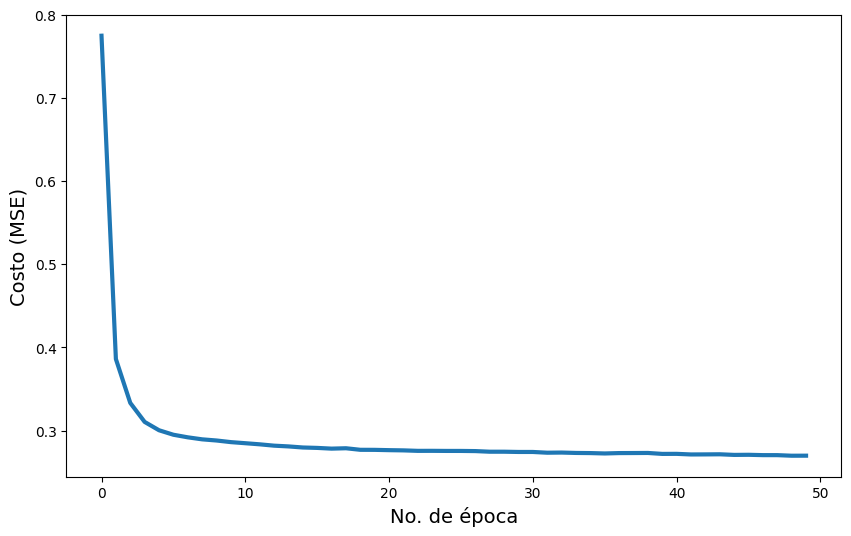

In [ ]:
# cost function visualization (MSE)
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Cost (MSE)', fontsize=14)

We see that around 25 iterations the cost function (MSE) reaches its minimum value, so it will not be necessary to consider a greater number of epochs.

We can visualize the behavior of additional metrics.

Text(0, 0.5, 'Métrica (MAE)')

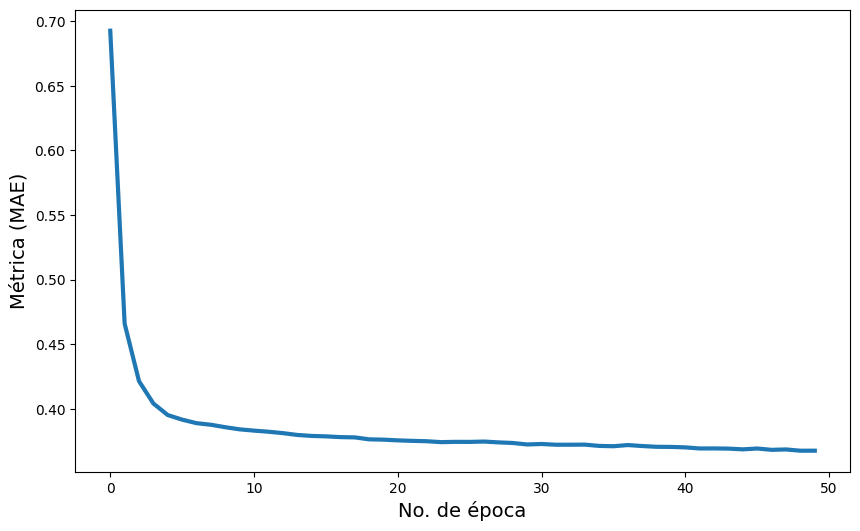

In [ ]:
# visualization of MAE
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAE)', fontsize=14)

Text(0, 0.5, 'Métrica (MAPE)')

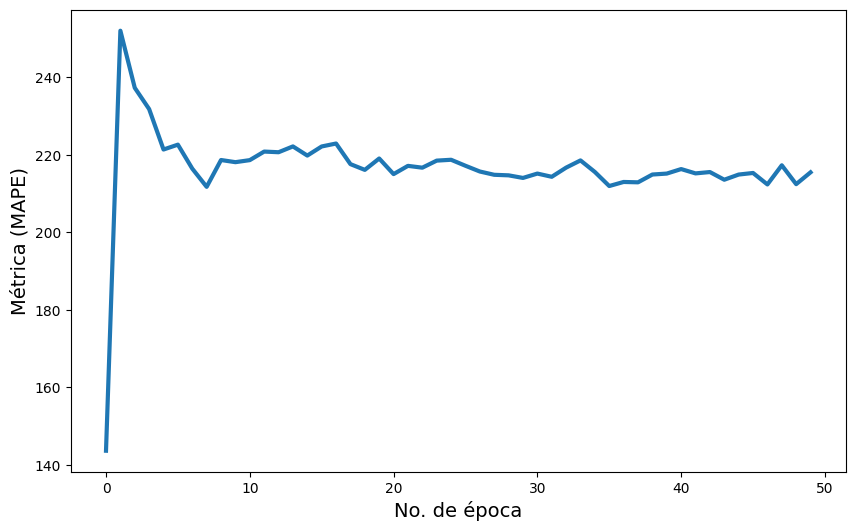

In [ ]:
# visualization of MAPE
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['mape'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAPE)', fontsize=14)

In [ ]:
# retrain the neural network with optimal epochs
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
217/217 [==============================] - 1s 6ms/step - loss: 0.2553 - mae: 0.3547 - mape: 211.3811
Epoch 2/30
217/217 [==============================] - 1s 7ms/step - loss: 0.2550 - mae: 0.3544 - mape: 211.2579
Epoch 3/30
217/217 [==============================] - 2s 8ms/step - loss: 0.2551 - mae: 0.3547 - mape: 208.5476
Epoch 4/30
217/217 [==============================] - 2s 8ms/step - loss: 0.2550 - mae: 0.3537 - mape: 211.4854
Epoch 5/30
217/217 [==============================] - 1s 6ms/step - loss: 0.2547 - mae: 0.3538 - mape: 207.0357
Epoch 6/30
217/217 [==============================] - 1s 3ms/step - loss: 0.2551 - mae: 0.3542 - mape: 208.1445
Epoch 7/30
217/217 [==============================] - 1s 3ms/step - loss: 0.2546 - mae: 0.3532 - mape: 208.4075
Epoch 8/30
217/217 [==============================] - 1s 3ms/step - loss: 0.2548 - mae: 0.3537 - mape: 210.0372
Epoch 9/30
217/217 [==============================] - 1s 3ms/step - loss: 0.2545 - mae: 0.3536 - mape: 2

In [ ]:
# we evaluate the final neural network
val_mse, val_mae, val_mape = model.evaluate(X_test, y_test, verbose=1)

213/213 [==============================] - 1s 4ms/step - loss: nan - mae: nan - mape: nan


213/213 [==============================] - 1s 2ms/step


Text(0, 0.5, 'Valores predichos')

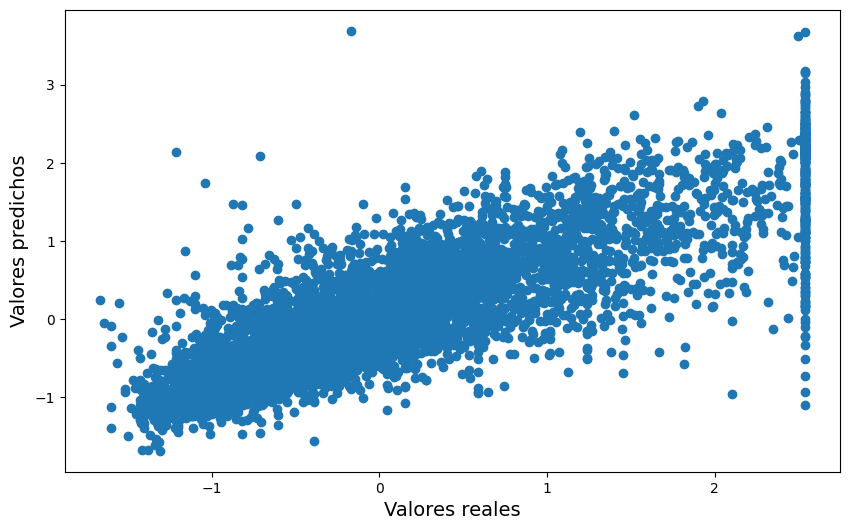

In [ ]:
# scatter plots
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, model.predict(X_test))

plt.xlabel('Valores reales', fontsize=14)
plt.ylabel('Valores predichos', fontsize=14)

**3. Improving the model**

We will now proceed to improve the architecture of the neural network to improve its performance.

In [ ]:
# training data
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = df[['MedHouseVal']]

#  dataset separation
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=42)

# data normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [ ]:
# improved model 2
def model_2(X):
  # create sequential model
  model = Sequential()

  # hidden layers of the neural network (2)
  model.add(Dense(5, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='normal', activation='relu'))

  # output layer of neural network (1)
  model.add(Dense(1, kernel_initializer='normal'))

  # compile model
  model.compile(loss='mse', metrics=['mae', 'mape'], optimizer='adam')

  return model

In [ ]:
# model summary
model_2 = model_2(X_train)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
226/226 [==============================] - 4s 5ms/step - loss: 0.9104 - mae: 0.7306 - mape: 114.6990
Epoch 2/50
226/226 [==============================] - 1s 5ms/step - loss: 0.6340 - mae: 0.5458 - mape: 155.2153
Epoch 3/50
226/226 [==============================] - 1s 5ms/step - loss: 0.5178 - mae: 0.4878 - mape: 184.1926
Epoch 4/50
226/226 [==============================] - 1s 6ms/step - loss: 0.4523 - mae: 0.4588 - mape: 200.0571
Epoch 5/50
226/226 [==============================] - 1s 5ms/step - loss: 0.4076 - mae: 0.4395 - mape: 211.3368
Epoch 6/50
226/226 [==============================] - 2s 7ms/step - loss: 0.3749 - mae: 0.4254 - mape: 219.4543
Epoch 7/50
226/226 [==============================] - 1s 6ms/step - loss: 0.3501 - mae: 0.4142 - mape: 226.1122
Epoch 8/50
226/226 [==============================] - 3s 11ms/step - loss: 0.3316 - mae: 0.4056 - mape: 233.5125
Epoch 9/50
226/226 [==============================] - 1s 5ms/step - loss: 0.3172 - mae: 0.3987 - mape: 

Text(0, 0.5, 'Costo (MSE)')

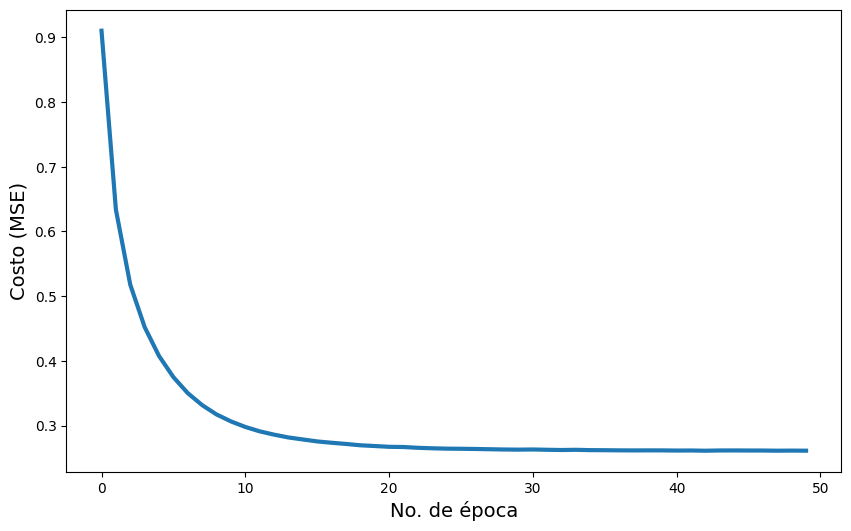

In [ ]:
# visualization of cost function (MSE)
fig = plt.figure(figsize=(10,6))
plt.plot(history_2.history['loss'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Cost (MSE)', fontsize=14)

Text(0, 0.5, 'Métrica (MAE)')

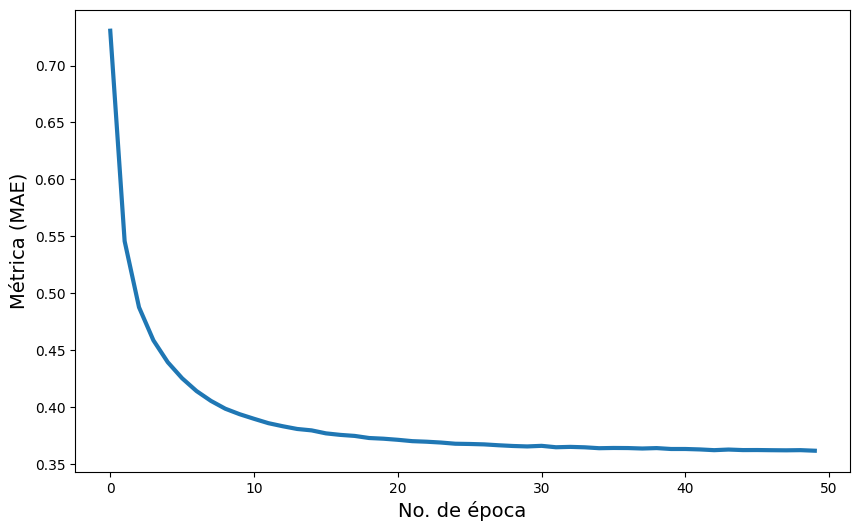

In [ ]:
# visualization of MAE
fig = plt.figure(figsize=(10,6))
plt.plot(history_2.history['mae'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAE)', fontsize=14)

Text(0, 0.5, 'Métrica (MAPE)')

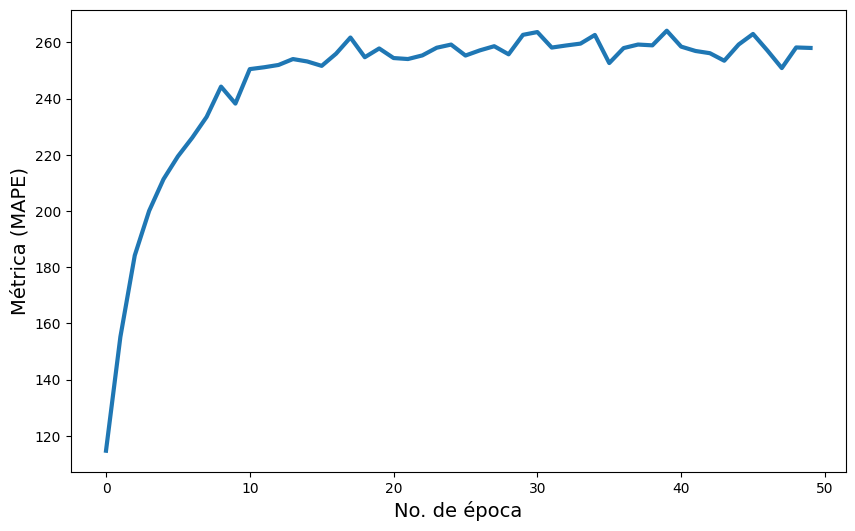

In [ ]:
# visualization of MAPE
fig = plt.figure(figsize=(10,6))
plt.plot(history_2.history['mape'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAPE)', fontsize=14)

In [ ]:
# we evaluate the final neural network
val_mse_2, val_mae_2, val_mape_2 = model_2.evaluate(X_test, y_test, verbose=1)

194/194 [==============================] - 1s 2ms/step - loss: 0.2664 - mae: 0.3688 - mape: 221.7728


In [ ]:
# improved model 3
def model_3():
  # create sequential model
  model = Sequential()

  # layers of the neural network
  model.add(Dense(5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
  model.add(Dense(5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal')) # última capa

  # compile model
  model.compile(loss='mse', metrics=['mae', 'mape'], optimizer='adam')

  return model

In [ ]:
# model summary
model_3 = model_3()
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
226/226 [==============================] - 3s 5ms/step - loss: 0.8104 - mae: 0.7083 - mape: 157.8158 - val_loss: 0.4110 - val_mae: 0.5029 - val_mape: 161.3712
Epoch 2/50
226/226 [==============================] - 1s 4ms/step - loss: 0.3297 - mae: 0.4292 - mape: 272.7694 - val_loss: 0.3137 - val_mae: 0.4135 - val_mape: 285.6383
Epoch 3/50
226/226 [==============================] - 1s 4ms/step - loss: 0.2965 - mae: 0.3978 - mape: 267.4662 - val_loss: 0.3040 - val_mae: 0.4048 - val_mape: 245.6890
Epoch 4/50
226/226 [==============================] - 1s 6ms/step - loss: 0.2895 - mae: 0.3895 - mape: 261.8018 - val_loss: 0.2965 - val_mae: 0.3931 - val_mape: 261.3458
Epoch 5/50
226/226 [==============================] - 1s 6ms/step - loss: 0.2854 - mae: 0.3857 - mape: 269.7020 - val_loss: 0.2923 - val_mae: 0.3883 - val_mape: 258.7474
Epoch 6/50
226/226 [==============================] - 1s 5ms/step - loss: 0.2814 - mae: 0.3821 - mape: 263.3781 - val_loss: 0.2879 - val_mae: 0.3851 -

Text(0, 0.5, 'Costo (MSE)')

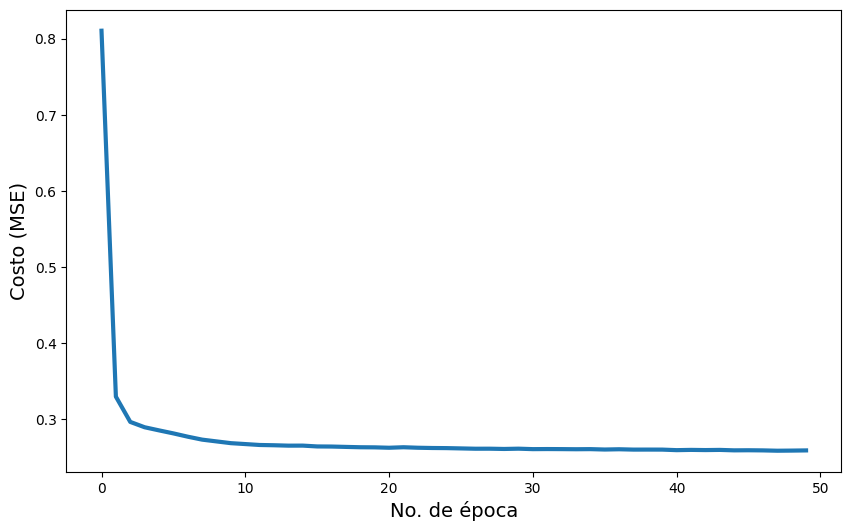

In [ ]:
# visualization of cost function (MSE)
fig = plt.figure(figsize=(10,6))
plt.plot(history_3.history['loss'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Cost (MSE)', fontsize=14)

Text(0, 0.5, 'Métrica (MAE)')

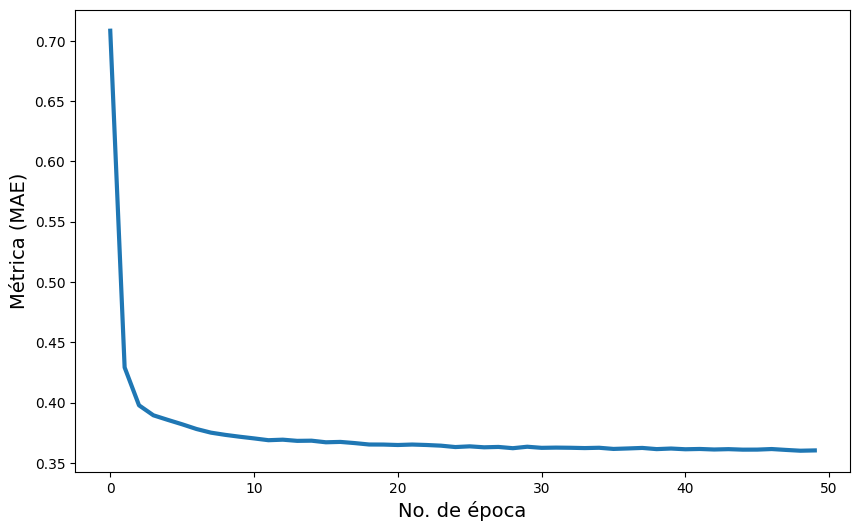

In [ ]:
# visualization of MAE
fig = plt.figure(figsize=(10,6))
plt.plot(history_3.history['mae'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAE)', fontsize=14)

Text(0, 0.5, 'Métrica (MAPE)')

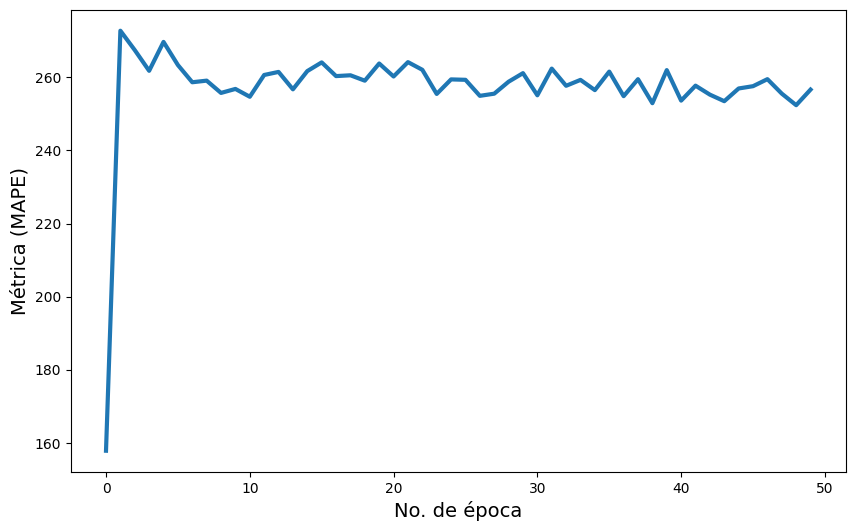

In [ ]:
# visualization of MAPE
fig = plt.figure(figsize=(10,6))
plt.plot(history_3.history['mape'], linestyle='-', linewidth=3.0)

plt.xlabel('Epoch Number', fontsize=14)
plt.ylabel('Metric (MAPE)', fontsize=14)

In [ ]:
# we evaluate the final neural network
val_mse_3, val_mae_3, val_mape_3 = model_3.evaluate(X_test, y_test, verbose=1)

194/194 [==============================] - 1s 3ms/step - loss: 0.2659 - mae: 0.3679 - mape: 234.9413


Comparing the three models worked, we see that the first one yields the best results.

In [ ]:
print('MSE (Model 1):', val_mse)
print('MSE (Model 2):', val_mse_2)
print('MSE (Model 3):', val_mse_3)

MSE (Modelo 1): 0.25840485095977783
MSE (Modelo 2): 0.26635101437568665
MSE (Modelo 3): 0.265935480594635


194/194 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Valores predichos')

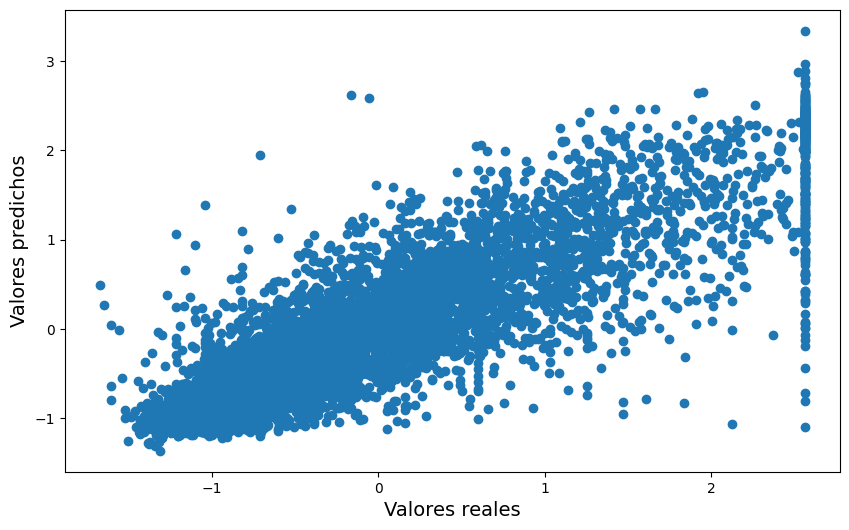

In [ ]:
# scatter plot
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, model_3.predict(X_test))

plt.xlabel('Observed', fontsize=14)
plt.ylabel('Predicted', fontsize=14)

**4. Cross validation**

In [ ]:
# we define the k-folds for validation
kf = KFold(n_splits=3, random_state=None, shuffle=True)
i = 1

val_mse_kfold, val_mae_kfold, val_mape_kfold = [], [], []

for train_index, test_index in kf.split(X):
  print('K-Fold #'+str(i)+' ...')
  # K-fold separation
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # data standardization
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)
  y_train = scaler.fit_transform(y_train)
  y_test = scaler.fit_transform(y_test)

  # model training
  history = model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=0)

  # evaluación del modelo
  val_mse, val_mae, val_mape = model.evaluate(X_test, y_test, verbose=1)

  val_mse_kfold.append(val_mse)
  val_mae_kfold.append(val_mae)
  val_mape_kfold.append(val_mse)

  i += 1

print('')
print('MSE (Cost):', val_mse_kfold)
print('MAE:', val_mae_kfold)
print('MAPE:', val_mape_kfold)

K-Fold #1 ...
215/215 [==============================] - 1s 3ms/step - loss: nan - mae: nan - mape: nan
K-Fold #2 ...
215/215 [==============================] - 1s 3ms/step - loss: nan - mae: nan - mape: nan
K-Fold #3 ...
215/215 [==============================] - 1s 2ms/step - loss: nan - mae: nan - mape: nan

MSE (Pérdida): [nan, nan, nan]
MAE: [nan, nan, nan]
MAPE: [nan, nan, nan]


In [ ]:
print('Cross-validation score (Averages)')
print('MSE (Cost):', np.mean(val_mse_kfold))
print('MAE:', np.mean(val_mae_kfold))
print('MAPE:', np.mean(val_mape_kfold))

Validación Cruzada (promedios)
MSE (Pérdida): 0.8717334270477295
MAE: 0.6148080329100291
MAPE: 0.8717334270477295
